**Section I: Import the Data**

Imports and Read in File

In [18]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.style.use('ggplot') 

In [2]:
filepath = "~/DSI-course-materials/curriculum/04-lessons/week-07/1.2-lab/assets/datasets/adult.csv"
adult = pd.read_csv(filepath)

**Section II: Format the Data**

Convert the data to a Pandas dataframe to work with the data:

In [3]:
print(adult.head())
adult.info()

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  small  
1             0             0             

In [4]:
adult.isnull().sum() / len(adult)

age               0.000000
workclass         0.057307
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        0.057512
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.017546
income            0.333340
dtype: float64

In [5]:
adult_data = adult.dropna()

Convert the categorical Data to numeric for our analysis. **HINT:** Refer to lesson 1.1 for writing a function of this sort

In [6]:
# Convert them into dummy variables instead

objects_mask = adult_data.dtypes == object
for feature in adult_data.loc[:, objects_mask].columns:
    adult_data.loc[:, feature] = adult_data.loc[:, feature].astype('category')

adult_data = pd.concat([adult_data, pd.get_dummies(adult_data.loc[:, objects_mask])], axis = 1)
# def category_dictionary(series):
#     dictionary = dict.fromkeys(series.unique())
#     for i, key in enumerate(dictionary.keys()):
#         dictionary[key] = i
#     return dictionary

# def map_category_to_numeric(series, dictionary):
#     series = series.map(dictionary)
#     return series

# master_object_features_dictionary = {}
# for column in adult_data.loc[:, adult_data.dtypes == object].columns:
#     master_object_features_dictionary[column] = category_dictionary(adult_data.loc[:, column])

# for feature in adult_data.loc[:, adult.dtypes == object].columns:
#     adult_data.loc[:, feature + "_numeric"] = map_category_to_numeric(adult_data.loc[:, feature], master_object_features_dictionary[feature])

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Apply the functions you just wrote and append the results to the dataframe

In [7]:
adult_data.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_large,income_small
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


**Section III: Examine the Data**

Plot the Data to see the distributions our our target markets; plot multiple indicators to see the relationships *IE: Education and Income*

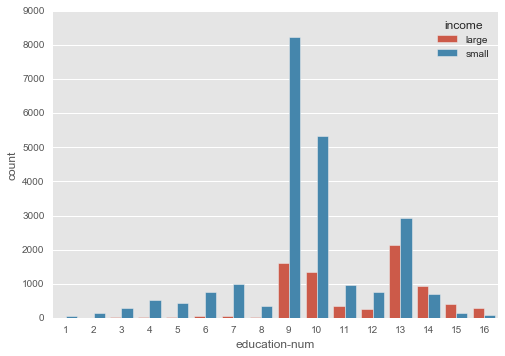

Craft-repair         401
Exec-managerial      259
Sales                200
Transport-moving     168
Adm-clerical         160
Machine-op-inspct    139
Prof-specialty        59
Other-service         53
Protective-serv       47
Farming-fishing       47
Tech-support          46
Handlers-cleaners     38
Priv-house-serv        0
Armed-Forces           0
Name: occupation, dtype: int64

In [8]:
sns.countplot(x = "education-num", hue = "income", data = adult_data)
sns.plt.show()
adult_data[(adult_data["education-num"] == 9) & (adult_data["income"] == 'large')]["occupation"].value_counts()

**Section IV: Prepare for Clustering**

Create a New Dataframe with just numerical data for the analysis

Check for NaN and Infinite Numbers - Our data is messy!

In [9]:
#np.any(np.isnan(...))

Convert the Pandas DataFrame to a Numpy Matrix - Your function will only take numerical inputs

In [26]:
education_income_dataframe = adult_data[["education-num", "income_small"]]
education_income_dataframe["education-num"] = scale(education_income_dataframe["education-num"])
education_income_dataframe["income_small"] = scale(education_income_dataframe["income_small"])
education_income_array = education_income_dataframe.as_matrix(columns = None)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [27]:
kmeans_model = cluster.KMeans(n_clusters = 2)
kmeans_model.fit(education_income_array)

labels = kmeans_model.labels_
centroids = kmeans_model.cluster_centers_

education_income_dataframe.loc[:, "cluster"] = labels
education_income_dataframe.loc[:, "cluster"] = education_income_dataframe["cluster"].map({0:'b', 1:'r'})

education_income_dataframe.dropna(inplace=True)

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

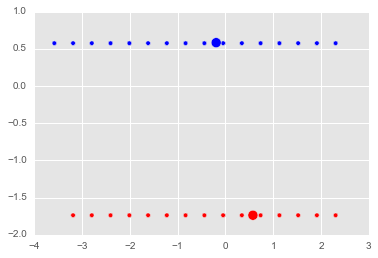

In [ ]:
# "education-num", "income_large" 

sns.plt.scatter(x = "education-num", y = "income_small", data = education_income_dataframe, c = education_income_dataframe["cluster"])
sns.plt.scatter(centroids[0], centroids[1], c=['b', 'r'], s=100)
sns.plt.show()

metrics.silhouette_score(education_income_array, labels, metric='euclidean')

**Section V: Clustering Analysis**

Cluster the Data to our our target groups. **BONUS**: Perform multiple clustering tests on various indicator variables

Get the labels and centroids

In [13]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

NameError: name 'kmeans' is not defined

Compute the Silhoutte Score to measure your analysis